Investigation of the crime rate in neighborhoods around Pittsburgh to find the best neighborhood for families:

## Importing Data

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
%matplotlib inline

# read csv on crime and confirm it's valid
incidents = pd.read_csv('police_incidents.csv')
incidents.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


## Investigating Data

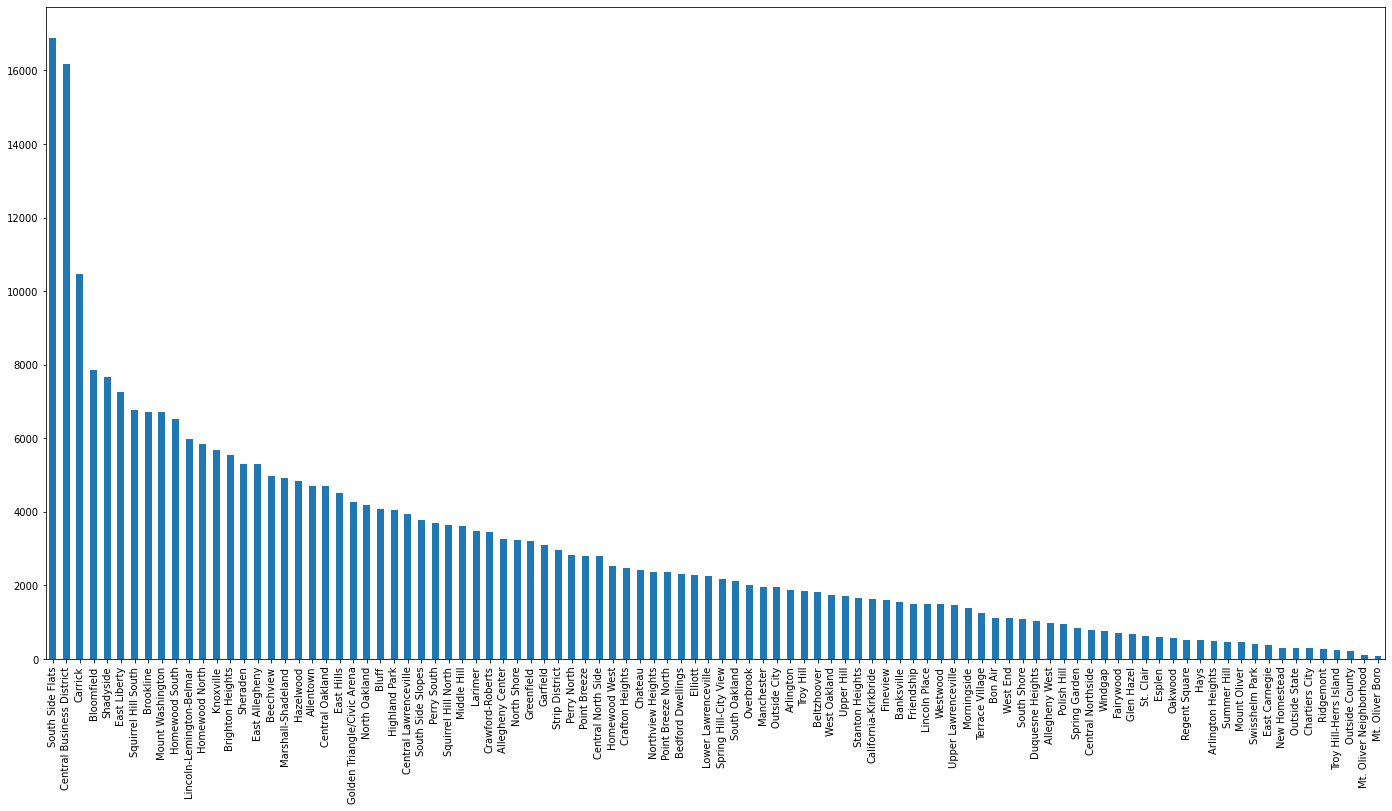

In [2]:
# organize our dataframe by neighborhood so we can count the number of each 
inc = incidents['INCIDENTNEIGHBORHOOD'].value_counts()

# graph out all data so we can get a general idea
inc.plot(kind = 'bar', figsize=(24,12))

In [3]:
# take a look at highest and lowest values
inc.sort_values()

Mt. Oliver Boro                 93
Mt. Oliver Neighborhood        117
Outside County                 211
Troy Hill-Herrs Island         252
Ridgemont                      274
                             ...  
Shadyside                     7654
Bloomfield                    7854
Carrick                      10457
Central Business District    16161
South Side Flats             16889
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

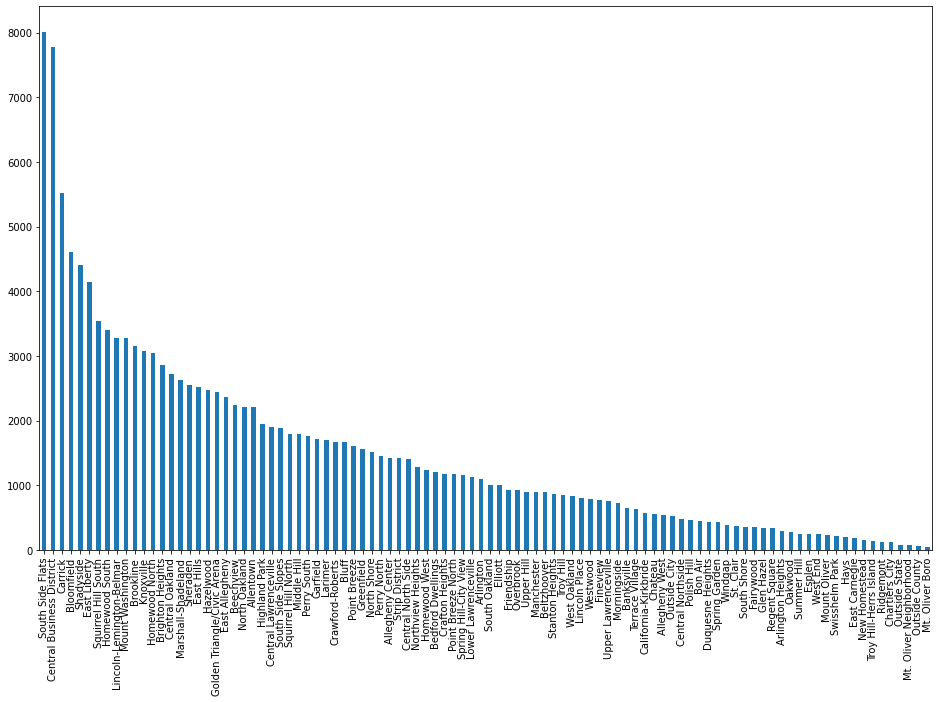

In [8]:
# examine only more violent crime
recent = incidents.loc[incidents['HIERARCHY'] < 15]
recent['INCIDENTNEIGHBORHOOD'].value_counts().plot(kind='bar',figsize = (18,12))

## Mapping Data

In [7]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

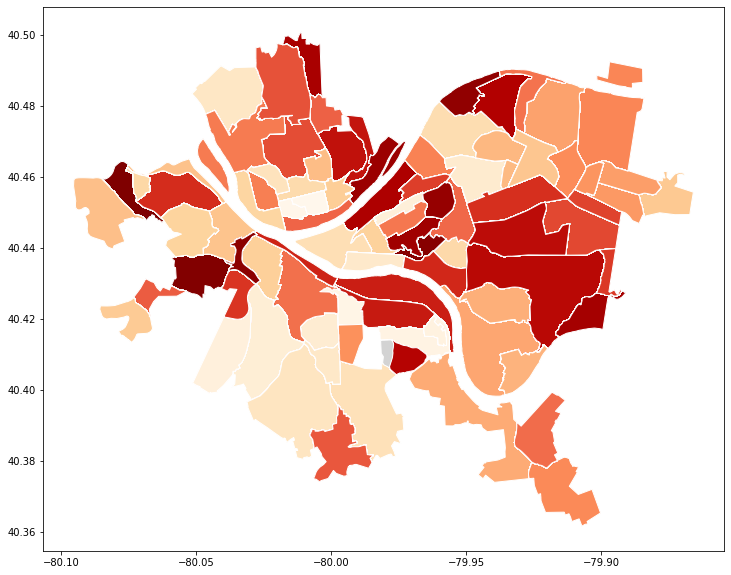

In [4]:
crime_map = neighborhoods.merge(incidents, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
crime_map.plot(column='INCIDENTNEIGHBORHOOD',
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               #legend=True,              # show the legend
               #legend_kwds={"label": "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

## Conclusion

- The worst neighborhood for raising a family (i.e. highest crime rate) would be South Side Flats, which is unsuprising considering the high number of bars, nightclubs, and activity that families generally do not partake in.

- The best neighborhood for raising a family when considering the lowest crime rate would be Mt. Oliver, as both boroughs of Mr. Oliver have the lowest number of crime incidents in Pittsburgh since 2016.